In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_colwidth = 200
pd.options.display.max_colwidth

200

In [3]:
imdb = pd.read_table('./sentiment labelled sentences/imdb_labelled.txt', 
                     header=None, quoting=3)
imdb.head()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


,0,1
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1


In [4]:
imdb.shape[0]

1000

In [5]:
imdb.columns = ['review', 'sentiment']

imdb['negative'] = (imdb['sentiment'] == 0)

imdb['positive'] = (imdb['sentiment'] == 1)

In [6]:
keywords_bad = ['suck', 'bad', 'slow', 'boring', 'ridiculous', 'wooden', 'lack', 'over']

for key in keywords_bad:
    imdb[str(key)] = imdb.review.str.contains(
      ' ' + str(key), 
        case=False
    )

In [7]:
data_bad = imdb[keywords_bad]
target_bad = imdb['negative']

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data_bad, target_bad)

y_pred = bnb.predict(data_bad)

print("Number of mislabeled points out of a total {} points : {}".format(
    data_bad.shape[0],
    (target_bad != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 413


In [8]:
imdb.shape[0]

1000

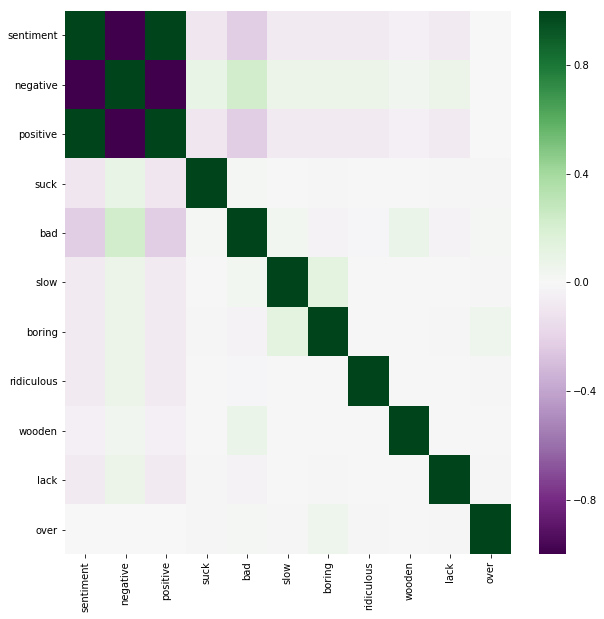

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(imdb.corr(), cmap='PRGn')

In [10]:
imdb = pd.read_table('./sentiment labelled sentences/imdb_labelled.txt', header=None, quoting=3)
imdb.columns = ['review', 'sentiment']
imdb['negative'] = (imdb['sentiment'] == 0)
imdb['positive'] = (imdb['sentiment'] == 1)

keywords_bad = ['bad', 'slow', 'bor', 'wooden', 'lack', 
                'waste', "didn't", 'free', 'just', "wouldn't", 
                'awful', 'no', 'only', 'terrible',
                'hate', 'suck', 'average', 'stupid',
                'sick', 'depress', 'little', 'ridiculous', 'shame',
                ' mess', 'cheap', 'beyond', "can't", 'avoid', 'hole',
                'disappoint', 'poor', 'fail', 'wrong']

for key in keywords_bad:
    imdb[str(key)] = imdb.review.str.contains(
        str(key), 
        case=False
    )

data_bad = imdb[keywords_bad]
target_bad = imdb['negative']


bnb = BernoulliNB()

bnb.fit(data_bad, target_bad)

y_pred = bnb.predict(data_bad)

print("Number of mislabeled points out of a total {} points : {}".format(
    data_bad.shape[0],
    (target_bad != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 255


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [11]:
imdb['result'] = y_pred
wrong = imdb.loc[imdb.negative != imdb.result, ]

In [12]:
wrong.loc[800:1000,]

,review,sentiment,negative,positive,bad,slow,bor,wooden,lack,waste,...,cheap,beyond,can't,avoid,hole,disappoint,poor,fail,wrong,result
800,"In fact, this stinker smells like a direct-to-video release.",0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
802,Star Trek V The final Frontier is the worst in the series.,0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
806,The worst one of the series.,0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
807,Editing: The editing of this film was phenomenal in my opinion.,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
810,"Of course the footage from the 70s was grainy, but that only enhanced the film.",1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
818,"The acting, as you'd expect from this cast, is top notch.",1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
823,I struggle to find anything bad to say about it.,1,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
826,"The film deserves strong kudos for taking this stand, for having exceptional acting from its mostly lesser-known cast and for the super-intelligent script that doesn't insult the audience or take ...",1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
828,Juano Hernandez (an exceptional actor who played supporting roles in many films of the era) is a proud black man who is accused of murdering a white man in the South.,1,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
832,"It was that year, however, that reminded us that Huston was still at the top of his game as evinced by his faithful adaptation of James Joyce's acclaimed novella ""The Dead.",1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [13]:
imdb_good = pd.read_table('./sentiment labelled sentences/imdb_labelled.txt', header=None, quoting=3)
imdb_good.columns = ['review', 'sentiment']
imdb_good['negative'] = (imdb_good['sentiment'] == 0)
imdb_good['positive'] = (imdb_good['sentiment'] == 1)

keywords_good = ['good', 'great', 'love', 'excellent', 'stunning', 
                'worth', 'best', '10/', "favourite", 
                'favorite', 'adorable', 'cute', 'hot', 'cool', 'high',
                'perfect', 'enjoy', 'fine', 'rock', 'funny', 'awesome',
                'amaz', 'well', 'go ', 'humour', 'must', 'fan', 'wonderful']

for key in keywords_good:
    imdb_good[str(key)] = imdb_good.review.str.contains(
        str(key), 
        case=False
    )

data_good = imdb_good[keywords_good]
target_good = imdb_good['positive']


bnb_good = BernoulliNB()

bnb_good.fit(data_good, target_good)

y_pred_good = bnb_good.predict(data_good)

print("Number of mislabeled points out of a total {} points : {}".format(
    data_good.shape[0],
    (target_good != y_pred_good).sum()
))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


Number of mislabeled points out of a total 1000 points : 292


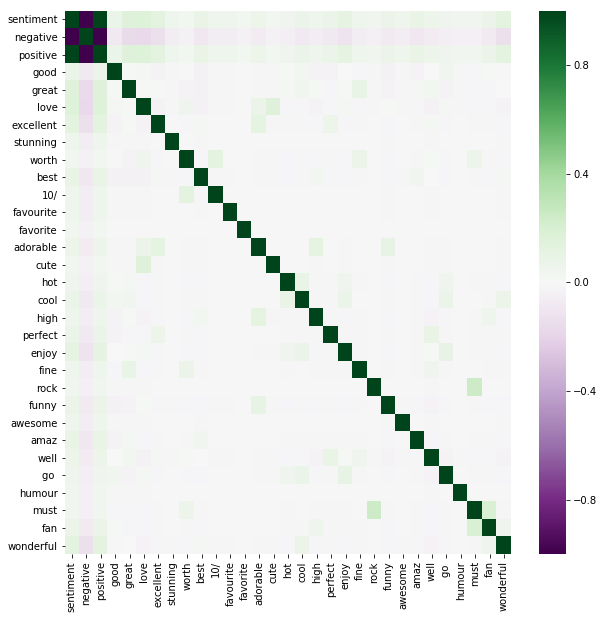

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(imdb_good.corr(), cmap='PRGn')

In [15]:
imdb_good['result'] = y_pred_good
wrong_good = imdb_good.loc[imdb_good.positive != imdb_good.result]

In [16]:
wrong_good.loc[800:1000,]

,review,sentiment,negative,positive,good,great,love,excellent,stunning,worth,...,funny,awesome,amaz,well,go,humour,must,fan,wonderful,result
805,The only place good for this film is in the garbage.,0,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
807,Editing: The editing of this film was phenomenal in my opinion.,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
808,"When a song could explain the emotions of the subjects better, such as when Jay Adams' unfortunate life was a subject of talk, the song Old Man by Neil Young was played, which evokes many emotions.",1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
810,"Of course the footage from the 70s was grainy, but that only enhanced the film.",1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
811,This film offers many delights and surprises.,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
814,You share General Loewenhielm's exquisite joy in his partaking of the Cailles en Sarcophage even though you are just watching a movie - but you do wish for just a small sample to savor.,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
815,But this understated film leaves a lasting impression.,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
816,The warmth it generates is in contrast to its austere backdrop.,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
818,"The acting, as you'd expect from this cast, is top notch.",1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
822,It's a long time since I was so entertained by a movie.,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
amazon = pd.read_table('./sentiment labelled sentences/amazon_cells_labelled.txt', header=None, quoting=3)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [18]:
len(amazon)

1000

In [19]:
amazon.head()

,0,1
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1


In [21]:
amazon.columns = ['review', 'sentiment']
amazon['negative'] = amazon['sentiment'] == 0

In [22]:
for key in keywords_bad:
    amazon[str(key)] = amazon.review.str.contains(
        str(key), 
        case=False
    )

amazon_data_bad = amazon[keywords_bad]

amazon_y_pred = bnb.predict(amazon_data_bad)

print("Number of mislabeled points out of a total {} points : {}".format(
    data_bad.shape[0],
    (amazon.negative != amazon_y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 308


In [23]:
## Not bad given some words are movie specific!

In [25]:
amazon['positive'] = amazon['sentiment'] == 1

for key in keywords_good:
    amazon[str(key)] = amazon.review.str.contains(
        str(key),
        case=False
    )
    
amazon_data_good = amazon[keywords_good]

amazon_y_pred_good = bnb_good.predict(amazon_data_good)

print("Number of mislabeled points out of a total {} points: {}".format(
    amazon_data_good.shape[0],
    (amazon.positive != amazon_y_pred_good).sum()
))

Number of mislabeled points out of a total 1000 points: 251


In [26]:
## Good one actually does better on Amazon!